In [1]:
# MNIST 미국 우편물 자동 분류기
# 필기체를 받았어.

In [50]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers
import numpy as np

In [30]:
# 1) 데이터셋 생성
(xTrain, yTrain),(xTest, yTest) = mnist.load_data()

In [31]:
# 28X28 pixel로 구성된 이미지가 60,000장 
xTrain
xTrain = xTrain.reshape(60000,28*28).astype('float32')/255.0
xTest = xTest.reshape(10000,28*28).astype('float32')/255.0

In [32]:
yTrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [33]:
# OneHotEncoding 자동!!
yTrain = np_utils.to_categorical(yTrain)
yTest = np_utils.to_categorical(yTest)

In [34]:
# 2) 모델 구성
model = Sequential()
model.add(Dense(units=64,input_dim=28*28,activation='relu')) # 레이어 추가!(Dense(출력노드 64개, 입력데이터의 차원(입력에만))) 
model.add(Dense(units=10,activation='softmax'))

In [35]:
# 3) 학습과정 설정
# cost함수, compile 함수
model.compile(loss="categorical_crossentropy",optimizer='sgd',metrics=['accuracy'])

In [36]:
# 4) 모델 학습
hist = model.fit(xTrain, yTrain, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6736 - accuracy: 0.8307
Epoch 2/5
1875/1875 [==============================] - 2s 940us/step - loss: 0.3378 - accuracy: 0.9057
Epoch 3/5
1875/1875 [==============================] - 2s 898us/step - loss: 0.2895 - accuracy: 0.9186
Epoch 4/5
1875/1875 [==============================] - 2s 890us/step - loss: 0.2609 - accuracy: 0.9272
Epoch 5/5
1875/1875 [==============================] - 2s 947us/step - loss: 0.2395 - accuracy: 0.9323


In [37]:
# 5) 학습과정
print(hist.history['loss'])

[0.6736010909080505, 0.3378284275531769, 0.28945672512054443, 0.2609385848045349, 0.23945824801921844]


In [42]:
# 6) 모델 평가
res = model.evaluate(xTest, yTest, batch_size=32)
print("모델 평가 결과: ",res) # [cost, accuacy]

313/313 [==============================] - 0s 884us/step - loss: 0.2256 - accuracy: 0.9354
모델 평가 결과:  [0.225600928068161, 0.9354000091552734]


In [47]:
# 7) 모델 사용
# 임의 입력 데이터 → 모델 → 예측값
yhat = model.predict(xTest[0:1])
print("예측 결과 : ",yhat) # → 7
print(np.sum(yhat[0]))
print(np.argmax(yhat[0]))

예측 결과 :  [[5.8247493e-05 9.1114964e-07 5.0399080e-04 2.7717180e-03 3.0261326e-06
  1.1920545e-04 6.9830655e-08 9.9592578e-01 2.0710198e-05 5.9649127e-04]]
1.0000001
7


## 단순선형회귀

In [54]:
# 선형회귀
x = np.array([1,2,3,4,5,6,7,8,9]) # 공부시간
y = np.array([11,20,31,47,52,69,74,89,100]) # 점수

### 9.5시간 → 점수 예측?

In [64]:
model=Sequential()

In [65]:
# yhat = wx + b
# yhat = w*9.5 + b
model.add(Dense(units=1,input_dim=1,activation='linear'))


sgd = optimizers.SGD(lr=0.01) # learning rate error를 낮추는 과정에서 업데이트의 간격을 조정
model.compile(loss="mse",optimizer='sgd',metrics=['mse'])


In [66]:
model.fit(x, y, epochs=100) 

Epoch 1/100
1/1 [==============================] - 0s 997us/step - loss: 4056.2861 - mse: 4056.2861
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 504.8679 - mse: 504.8679
Epoch 3/100
1/1 [==============================] - 0s 988us/step - loss: 67.8800 - mse: 67.8800
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: 14.0995 - mse: 14.0995
Epoch 5/100
1/1 [==============================] - 0s 998us/step - loss: 7.4698 - mse: 7.4698
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 6.6419 - mse: 6.6419
Epoch 7/100
1/1 [==============================] - 0s 1ms/step - loss: 6.5279 - mse: 6.5279
Epoch 8/100
1/1 [==============================] - 0s 997us/step - loss: 6.5018 - mse: 6.5018
Epoch 9/100
1/1 [==============================] - 0s 996us/step - loss: 6.4867 - mse: 6.4867
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 6.4730 - mse: 6.4730
Epoch 11/100
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 2ms/step - loss: 5.7052 - mse: 5.7052
Epoch 88/100
1/1 [==============================] - 0s 997us/step - loss: 5.6981 - mse: 5.6981
Epoch 89/100
1/1 [==============================] - 0s 996us/step - loss: 5.6911 - mse: 5.6911
Epoch 90/100
1/1 [==============================] - 0s 997us/step - loss: 5.6841 - mse: 5.6841
Epoch 91/100
1/1 [==============================] - 0s 997us/step - loss: 5.6771 - mse: 5.6771
Epoch 92/100
1/1 [==============================] - 0s 1ms/step - loss: 5.6703 - mse: 5.6703
Epoch 93/100
1/1 [==============================] - 0s 997us/step - loss: 5.6634 - mse: 5.6634
Epoch 94/100
1/1 [==============================] - 0s 998us/step - loss: 5.6567 - mse: 5.6567
Epoch 95/100
1/1 [==============================] - 0s 3ms/step - loss: 5.6499 - mse: 5.6499
Epoch 96/100
1/1 [==============================] - 0s 996us/step - loss: 5.6433 - mse: 5.6433
Epoch 97/100
1/1 [==============================] - 0s 997us/step - l

In [67]:
# 예측
# 9.5시간 공부하면 몇점나와?
# 7.2시간 공부하면 몇점나와?
print(model.predict([9.5]))
print(model.predict([7.2]))

[[104.12591]]
[[79.10467]]


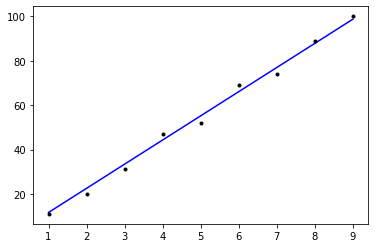

In [68]:
import matplotlib.pyplot as plt
plt.plot(x,model.predict(x),'b',x,y,'k.') # 실제데이터는 검정색 점, 선형 예측은 파란색 직선

## 로지스틱 회귀(이진분류)

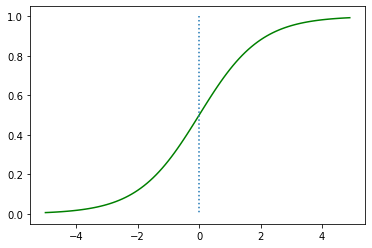

In [73]:
def mySigmoid(x):
    return 1 / (1+np.exp(-x))

    
x=np.arange(-5,5,0.1) # -5 ~ +4.9
y = mySigmoid(x)
plt.plot(x,y,'g')
plt.plot([0,0],[1,0],':')

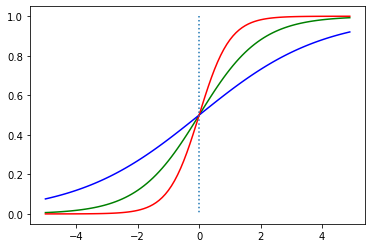

In [78]:
def mySigmoid2(x):
    return 1 / (1+np.exp(-x))

    
x=np.arange(-5,5,0.1) # -5 ~ +4.9
y1 = mySigmoid(x) # w=1
y2 = mySigmoid(0.5*x) # w=0.5
y3 = mySigmoid(2*x) # w=2
plt.plot(x,y1,'g')
plt.plot(x,y2,'b')
plt.plot(x,y3,'r')
plt.plot([0,0],[1,0],':')

In [79]:
x=np.array([-50,-40,-30,-20,-10,-5,0,5,10,22,31,47,55])
y=np.array([0,0,0,0,0,0,0,1,1,1,1,1,1])

In [80]:
# x=3, y=? 0 or 1?

In [82]:
model=Sequential()
model.add(Dense(1,input_dim=1,activation='sigmoid'))

In [83]:
#logistic regression → classification
sgd = optimizers.SGD(lr=0.01)
model.compile(loss="binary_crossentropy",optimizer='sgd',metrics=['binary_accuracy'])

In [86]:
model.fit(x,y,epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 1ms/step - loss: 0.0492 - binary_accuracy: 1.0000
Epoch 2/5
1/1 [==============================] - 0s 996us/step - loss: 0.0492 - binary_accuracy: 1.0000
Epoch 3/5
1/1 [==============================] - 0s 996us/step - loss: 0.0492 - binary_accuracy: 1.0000
Epoch 4/5
1/1 [==============================] - 0s 2ms/step - loss: 0.0492 - binary_accuracy: 1.0000
Epoch 5/5
1/1 [==============================] - 0s 998us/step - loss: 0.0492 - binary_accuracy: 1.0000


array([[0.7896277 ],
       [0.9851662 ],
       [0.99643326]], dtype=float32)

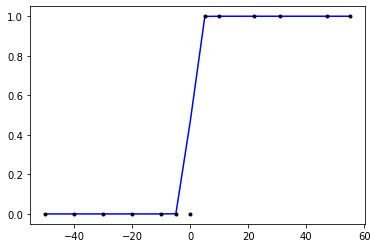

In [89]:
plt.plot(x,model.predict(x),'b',x,y,'k.')
model.predict([1,3,4])